In [1]:
import numpy as np
import pandas as pd
from typing import  List

In [5]:
import pickle
with open('/Users/qijun/Desktop/MTH628/stocks_labeled.pkl', 'rb') as file:
    stocks = pickle.load(file)
    
stocks

ticker  PERMNO       Date     DlyVol  DlyClose  DlyLow  DlyHigh  \
0         JJSF   10026 2013-03-20    28686.0     73.87   72.88    74.20   
1         JJSF   10026 2013-03-22    42919.0     74.60   73.45    75.00   
2         JJSF   10026 2013-03-26    40761.0     75.83   74.73    75.84   
3         JJSF   10026 2013-03-28    34374.0     76.89   75.68    77.33   
4         JJSF   10026 2013-04-01    49847.0     75.12   74.86    77.04   
...        ...     ...        ...        ...       ...     ...      ...   
1280303    IAC   78840 2023-11-14  1014185.0     48.02   45.58    48.40   
1280304    IAC   78840 2023-11-29   753816.0     47.52   47.30    48.98   
1280305    IAC   78840 2023-12-01   687419.0     48.92   47.30    48.99   
1280306    IAC   78840 2023-12-06   426867.0     47.36   47.33    48.79   
1280307    IAC   78840 2023-12-08   640611.0     49.07   47.58    49.34   

         DlyOpen    SMA_20   SMA_50  ...    Gap_CC        RSI    Return  \
0          72.97  70.65550  68.5492  ...  0.014837  76.064825  0.003435   
1          73.57  71.17250  68.9448  ...  0.013862  76.597490  0.003203   
2          75.30  71.83150  69.3840  ...  0.010528  80.307088  0.002425   
3          76.32  72.56900  69.8394  ...  0.009453  83.006625  0.002171   
4          77.04  72.82600  70.0336  ... -0.023020  66.283949 -0.005363   
...          ...       ...      ...  ...       ...        ...       ...   
1280303    46.23  44.29450  48.0228  ...  0.071158  59.812415  0.018076   
1280304    48.57  46.44125  47.0327  ... -0.013289  52.830716 -0.003453   
1280305    47.75  47.01575  46.8813  ...  0.022789  59.877730  0.005826   
1280306    48.48  47.51225  46.7511  ... -0.011067  49.956246 -0.002876   
1280307    48.00  47.92575  46.6971  ...  0.022505  58.919056  0.005749   

         Lag_Return_1  Lag_Return_2  Lag_Return_3  Tomorrow_Return   End Time  \
0            0.001967     -0.000065      0.000616        -0.000914 2013-03-22   
1           -0.000914      0.003435      0.001967         0.001364 2013-03-26   
2            0.001364      0.003203     -0.000914         0.001034 2013-03-28   
3            0.001034      0.002425      0.001364        -0.005363 2013-04-01   
4            0.002171      0.001034      0.002425         0.002270 2013-04-05   
...               ...           ...           ...              ...        ...   
1280303     -0.003196      0.008524     -0.005390         0.005297 2023-11-15   
1280304      0.001021     -0.002672      0.000160         0.001684 2023-12-01   
1280305      0.001684     -0.003453      0.001021        -0.001581 2023-12-05   
1280306     -0.003895     -0.001581      0.005826         0.003425 2023-12-08   
1280307      0.003425     -0.002876     -0.003895        -0.000419 2023-12-13   

         Return of Label  Label  
0               0.009882    1.0  
1               0.016488    1.0  
2               0.013979    1.0  
3              -0.023020   -1.0  
4              -0.015708   -1.0  
...                  ...    ...  
1280303         0.020721    1.0  
1280304         0.029461    1.0  
1280305        -0.021055   -1.0  
1280306         0.036106    1.0  
1280307         0.026085    1.0  

[1280308 rows x 30 columns]

In [9]:
data = stocks.set_index(["Date", "PERMNO"], drop=False)  #把 Date 和 PERMNO 两列设为MultiIndex（多级索引）。drop=False 表示：虽然把这两列设为索引，但仍然保留这两列在列里（不从 columns 删除）。
data = data.sort_index(level=0) #按索引的第 0 级（这里是 Date）排序。保证日期是有序的（对时间序列分析很重要）。

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1280308 entries, (Timestamp('2013-03-20 00:00:00'), 10026) to (Timestamp('2023-12-08 00:00:00'), 93368)
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ticker           1280308 non-null  object        
 1   PERMNO           1280308 non-null  int64         
 2   Date             1280308 non-null  datetime64[ns]
 3   DlyVol           1280308 non-null  float64       
 4   DlyClose         1280308 non-null  float64       
 5   DlyLow           1280308 non-null  float64       
 6   DlyHigh          1280308 non-null  float64       
 7   DlyOpen          1280308 non-null  float64       
 8   SMA_20           1280308 non-null  float64       
 9   SMA_50           1280308 non-null  float64       
 10  EMA_20           1280308 non-null  float64       
 11  EMA_50           1280308 non-null  float64       
 12  ret_1d           1280308 non-null  flo

In [11]:
data.index.value_counts()

Date        PERMNO
2013-03-20  10026     1
2020-04-09  92118     1
            92589     1
            92523     1
            92303     1
                     ..
2016-11-11  16548     1
            15845     1
            15838     1
            15831     1
2023-12-08  93368     1
Name: count, Length: 1280308, dtype: int64

In [13]:
data.drop_duplicates(subset=None, keep="first", inplace=True)
data.index.value_counts()

Date        PERMNO
2013-03-20  10026     1
2020-04-09  92118     1
            92589     1
            92523     1
            92303     1
                     ..
2016-11-11  16548     1
            15845     1
            15838     1
            15831     1
2023-12-08  93368     1
Name: count, Length: 1280308, dtype: int64

In [19]:
data.shape

(1280308, 30)

In [21]:
data_final = data.copy()

In [29]:
%pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3bae058fe782ce2164c607e2a03e128f0b49e1b67064bbbb1569dbfb5cb40ba1
  Stored in directory: /Users/qijun/Library/Caches/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [31]:
#labeling
import pandas as pd
import numpy as np 
import numpy as np
import pandas as pd
from typing import List


def cusum_filter_events_dynamic_threshold(
        prices: pd.Series,
        threshold: pd.Series
) -> pd.DatetimeIndex:
    """
    Detect events using the Symmetric Cumulative Sum (CUSUM) filter.

    The Symmetric CUSUM filter is a change-point detection algorithm used to identify events where the price difference
    exceeds a predefined threshold.

    :param prices: A pandas Series of prices.
    :param threshold: A pandas Series containing the predefined threshold values for event detection.
    :return: A pandas DatetimeIndex containing timestamps of detected events.

    References:
    - De Prado, M. (2018) Advances in financial machine learning. John Wiley & Sons. (Methodology: 39)
    """
    time_events, shift_positive, shift_negative = [], 0, 0 #time_events：用来存检测到的事件时间；shift_positive：CUSUM 正向累积和；shift_negative：CUSUM 负向累积和
    price_delta = prices.diff().dropna() #计算相邻价格差（今日价 - 昨日价），去掉第一个 NaN。
    thresholds = threshold.copy()
    price_delta, thresholds = price_delta.align(thresholds, join="inner", copy=False) #对齐 price_delta 和 thresholds 的索引，只保留二者都有的日期，确保一一对应。

    for (index, value), threshold_ in zip(price_delta.to_dict().items(), thresholds.to_dict().values()): #price_delta.to_dict().items() 把差价序列变成 (日期, 差值) 对；
        shift_positive = max(0, shift_positive + value) #shift_positive 累加正向变化，若变成负数则重置为 0
        shift_negative = min(0, shift_negative + value) #shift_negative 累加负向变化，若变成正数则重置为 0；这是对正负方向的价格变化分别累计，类似检测“持续上涨/持续下跌”

        if shift_negative < -threshold_: #当 shift_negative 小于 -threshold_（即负方向累计跌幅超过阈值）→ 记录为事件，重置负向累和
            shift_negative = 0
            time_events.append(index)

        elif shift_positive > threshold_: #当 shift_positive 大于 threshold_（正向累计涨幅超过阈值）→ 记录为事件，重置正向累和
            shift_positive = 0
            time_events.append(index)

    return pd.DatetimeIndex(time_events)


def daily_volatility_with_log_returns(
        close: pd.Series,
        span: int = 100
) -> pd.Series:
    """
    Calculate the daily volatility at intraday estimation points using Exponentially Weighted Moving Average (EWMA).

    :param close: A pandas Series of daily close prices.
    :param span: The span parameter for the Exponentially Weighted Moving Average (EWMA).
    :return: A pandas Series containing daily volatilities.

    References:
    - De Prado, M. (2018) Advances in financial machine learning. John Wiley & Sons. (Methodology: Page 44)
    """
    df1 = close.index.searchsorted(close.index - pd.Timedelta(days=1))
    df1 = df1[df1 > 0]
    df = pd.DataFrame(index=close.index[close.shape[0] - df1.shape[0]:])
 
    df['yesterday'] = close.iloc[df1].values
    df['two_days_ago'] = close.iloc[df1 - 1].values
    returns = np.log(df['yesterday'] / df['two_days_ago'])
    
    stds = returns.ewm(span=span).std().rename("std")

    return stds。#返回的是一个随时间变化的波动率估计 stds


def vertical_barrier(    #想法：对每个事件时间 t0，往后固定 number_days 天，设一个时间上的止损/止盈结束点（不管价格怎么样，到这个时间也要出场）
    close: pd.Series,
    time_events: pd.DatetimeIndex,
    number_days: int
) -> pd.Series:
    """
    Shows one way to define a vertical barrier.

    :param close: A dataframe of prices and dates.
    :param time_events: A vector of timestamps.
    :param number_days: A number of days for the vertical barrier.
    :return: A pandas series with the timestamps of the vertical barriers.
    """
    timestamp_array = close.index.searchsorted(time_events + pd.Timedelta(days=number_days))
    timestamp_array = timestamp_array[timestamp_array < close.shape[0]]
    timestamp_array = pd.Series(close.index[timestamp_array], index=time_events[:timestamp_array.shape[0]])
    return timestamp_array #最终构造 Series：index = 事件时间 t0;value = 对应的竖直障碍时间 t0 + number_days（在数据中的实际交易日）


def triple_barrier(
    close: pd.Series,
    events: pd.DataFrame,
    profit_taking_stop_loss: list[float, float],
    molecule: list
) -> pd.DataFrame:
    # Filter molecule to ensure all timestamps exist in events
    molecule = [m for m in molecule if m in events.index]

    # Continue with the existing logic
    events_filtered = events.loc[molecule]
    output = events_filtered[['End Time']].copy(deep=True)

    if profit_taking_stop_loss[0] > 0:
        profit_taking = profit_taking_stop_loss[0] * events_filtered['Base Width']
    else:
        profit_taking = pd.Series(index=events.index)

    if profit_taking_stop_loss[1] > 0:
        stop_loss = -profit_taking_stop_loss[1] * events_filtered['Base Width']
    else:
        stop_loss = pd.Series(index=events.index)

    for location, timestamp in events_filtered['End Time'].fillna(close.index[-1]).items():
        df = close[location:timestamp] #takes the price path from start to the vertical barrier:
        df = np.log(df / close[location]) * events_filtered.at[location, 'Side'] #Converts prices to log returns relative to entry, adjusted by Side
        output.loc[location, 'stop_loss'] = df[df < stop_loss[location]].index.min()#earliest time where stop loss is hit within vertical time horizon
        output.loc[location, 'profit_taking'] = df[df > profit_taking[location]].index.min()#earliest time where profit taking is hit within vertical time horizon

    return output #返回的是：每个事件对应的首次止损时间 / 首次止盈时间


def meta_events(
    close: pd.Series,
    time_events: pd.DatetimeIndex,
    ptsl: List[float],
    target: pd.Series,
    return_min: float,
    num_threads: int,
    timestamp: pd.Series = False,
    side: pd.Series = None
) -> pd.DataFrame:
    # Filter target by time_events and return_min
    target = target.loc[time_events]
    target = target[target > return_min]

    # Ensure timestamp is correctly initialized
    if timestamp is False:
        timestamp = pd.Series(pd.NaT, index=time_events)
    else:
        #set timestamps to events start date.
        timestamp = timestamp.loc[time_events]

    if side is None:
        #if none. side_position is filled entirely with one, so we always go long at every event.
        #both profit and loss barrier is set to the same value.
        side_position, profit_loss = pd.Series(1., index=target.index), [ptsl[0], ptsl[0]]
    else:
        #if side is set then side_position is either 1 for long or -1 for short. 
        #profit and loss barrier is set to the same value.
        side_position, profit_loss = side.loc[target.index], ptsl[:2]

    # Include 'target' and 'timestamp' in the events DataFrame
    events = pd.concat({'End Time': timestamp, 'Base Width': target, 'Side': side_position, 'target': target, 'timestamp': timestamp}, axis=1).dropna(subset=['Base Width'])

    df0 = list(map(
        triple_barrier,
        [close] * num_threads,
        [events] * num_threads,
        [profit_loss] * num_threads,
        np.array_split(time_events, num_threads)
    ))
    df0 = pd.concat(df0, axis=0)

    #set End Time to earliest barrier hit.
    events['End Time'] = df0.dropna(how='all').min(axis=1)

    if side is None:
        events = events.drop('Side', axis=1)

    # Return events including the 'target' and 'timestamp' columns
    return events , df0


def triple_barrier_labeling(
    events: pd.DataFrame,
    close: pd.Series
) -> pd.DataFrame:
    
    events_filtered = events.dropna(subset=['End Time'])
    all_dates = events_filtered.index.union(events_filtered['End Time'].values).drop_duplicates()
    close_filtered = close.reindex(all_dates, method='bfill')
    out = pd.DataFrame(index=events_filtered.index)
    
    #time of first barrier hit
    out['End Time'] = events['End Time']

    #return timestamp
    out["timestamp"] = events["timestamp"]

    #Set the Side to either 1/-1 (long/short) depending on wether the stock price difference is positive (long) or negative (short)
    out['Side'] =  np.sign(close_filtered.loc[events_filtered['End Time'].values].values - close_filtered.loc[events_filtered.index])
    
    return out #这里构造的是「纯价格运动方向」：结束价格比开始高 → +1，反之 → -1。

def meta_labeling(
    events: pd.DataFrame,
    close: pd.Series
) -> pd.DataFrame:
    """
    Expands label to incorporate meta-labeling.

    :param events: DataFrame with timestamp of vertical barrier and unit width of the horizontal barriers.
    :param close: Series of close prices with date indices.
    :return: DataFrame containing the return and binary labels for each event.

    Reference:
    De Prado, M. (2018) Advances in financial machine learning. John Wiley & Sons.
    Methodology: 51
    """
    events_filtered = events.dropna(subset=['End Time'])
    all_dates = events_filtered.index.union(events_filtered['End Time'].values).drop_duplicates()
    close_filtered = close.reindex(all_dates, method='bfill')
    out = pd.DataFrame(index=events_filtered.index)
    
    #time of first barrier hit
    #out['End Time'] = events['End Time']

    #Return of Label: close price at end time/ close price at start time - 1.
    out['Return of Label'] = close_filtered.loc[events_filtered['End Time'].values].values / close_filtered.loc[events_filtered.index] - 1

    #timestamp contains original vertical barrier dates per event. The equality returns zero if unequal so pt or sl
    # is hit or 1 if vertical barrier is hit. So Label = 1 if a barrier is hit and 0 if vertical barrier is hit.    
    if 'Side' in events_filtered:
        out['Return of Label'] *= events_filtered['Side']
    out['Label'] = np.sign(out['Return of Label'])  * (1 - (events['End Time'] == events['timestamp']))
    if 'Side' in events_filtered:
        out.loc[out['Return of Label'] <= 0, 'Label'] = 0
        #out['Side'] = events_filtered['Side']
    return out
#是典型的 meta-labeling：只保留“方向正确且收益为正”的信号为 1，其余都记作 0（不值得跟）

In [33]:
permno_list = data_final["PERMNO"].unique()

In [35]:
from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator, EMAIndicator, MACD

def compute_features(data: pd.DataFrame, windows=(5, 10, 20, 50, 100)):

    # Ensure the dataset has the required columns
    required_column = ["DlyClose", "DlyOpen","DlyHigh", "DlyLow"]
    if not all(col in data.columns for col in required_column):
        raise ValueError(f"Dataset must contain the following columns: {required_column}")
    
    # 1. TREND / LEVEL FEATURES
        # Simple Moving Average (SMA) 20 日 & 50 日简单移动平均
    data['SMA_20'] = SMAIndicator(close=data["DlyClose"], window=20).sma_indicator()
    data['SMA_50'] = SMAIndicator(close=data["DlyClose"], window=50).sma_indicator()

        # Exponential Moving Average (EMA) 20 日 & 50 日指数移动平均
    data['EMA_20'] = EMAIndicator(close=data["DlyClose"], window=20).ema_indicator()
    data['EMA_50'] = EMAIndicator(close=data["DlyClose"], window=50).ema_indicator()


    # 2. MOMENTUM 计算 MACD 指标和其信号线
    for w in (1, 5, 10, 20):
        data[f"ret_{w}d"] = data["DlyClose"].pct_change(w)
    
        # Moving Average Convergence Divergence (MACD)
    macd_indicator = MACD(close=data["DlyClose"], window_slow=26, window_fast=12, window_sign=9)
    data['MACD'] = macd_indicator.macd()
    data['MACD_Signal'] = macd_indicator.macd_signal()
    

    # 3. BANDS / OSCILLATORS
        # Bollinger Bands (20)
    data["HL_range"] = (data["DlyHigh"] - data["DlyLow"]) / data["DlyClose"]
    data["Gap_OC"] = (data["DlyOpen"] - data["DlyClose"].shift(1)) / data["DlyClose"].shift(1)
    data["Gap_CC"] = data["DlyClose"].pct_change()

        # Relative Strength Index (RSI)
    data['RSI'] = RSIIndicator(close=data["DlyClose"], window=14).rsi()


    #4. Returns and lagged returns
    data['Return'] = np.log(data['DlyClose']).diff()
    data['Lag_Return_1'] = data['Return'].shift(1)
    data['Lag_Return_2'] = data['Return'].shift(2)
    data['Lag_Return_3'] = data['Return'].shift(3)

    # 5. Tomorrow's return (forward-looking)
    data['Tomorrow_Return'] = data['Return'].shift(-1)

    # Dropping NaN values caused by rolling calculations
    data = data.dropna()

    return data

In [37]:
data_final

ticker  PERMNO       Date     DlyVol  DlyClose    DlyLow  \
Date       PERMNO                                                            
2013-03-20 10026    JJSF   10026 2013-03-20    28686.0    73.870   72.8800   
           10065     ADX   10065 2013-03-20    91200.0    11.710   11.6600   
           10145     HON   10145 2013-03-20  3636100.0    74.700   74.3700   
           10158    AMRC   10158 2013-03-20   686800.0     6.700    6.6350   
           10252    INDB   10252 2013-03-20    59853.0    32.510   32.2000   
...                  ...     ...        ...        ...       ...       ...   
2023-12-08 93096      DG   93096 2023-12-08  6688719.0   127.220  125.7800   
           93134    GRID   93134 2023-12-08    28979.0    98.810   98.1400   
           93153     CCM   93153 2023-12-08     2822.0     1.050    1.0500   
           93231    EUFN   93231 2023-12-08   186712.0    20.620   20.4600   
           93368    EBMT   93368 2023-12-08     5383.0    13.775   13.4989   

                    DlyHigh  DlyOpen      SMA_20      SMA_50  ...    Gap_CC  \
Date       PERMNO                                             ...             
2013-03-20 10026    74.2000    72.97   70.655500   68.549200  ...  0.014837   
           10065    11.7500    11.70   11.514000   11.378600  ...  0.001711   
           10145    74.8700    74.37   71.853500   69.926200  ...  0.009050   
           10158     7.3700     7.20    7.872500    8.763800  ... -0.058989   
           10252    32.5400    32.50   31.744500   31.266400  ...  0.008375   
...                     ...      ...         ...         ...  ...       ...   
2023-12-08 93096   135.1300   133.01  126.181000  118.409400  ... -0.038398   
           93134    99.1965    98.14   95.660750   92.238896  ...  0.005188   
           93153     1.1101     1.11    1.081475    1.159632  ... -0.054054   
           93231    20.6400    20.46   19.947500   19.135600  ...  0.005854   
           93368    13.8000    13.50   12.312250   11.958000  ...  0.025689   

                         RSI    Return  Lag_Return_1  Lag_Return_2  \
Date       PERMNO                                                    
2013-03-20 10026   76.064825  0.003435      0.001967     -0.000065   
           10065   64.844151  0.000695      0.000348     -0.000348   
           10145   74.530610  0.002093      0.000440      0.001358   
           10158   20.357494 -0.030975     -0.029007     -0.006467   
           10252   64.442109  0.002401      0.000806      0.000718   
...                      ...       ...           ...           ...   
2023-12-08 93096   53.089755 -0.008015     -0.002485      0.000810   
           93134   75.083469  0.001128      0.001941      0.000471   
           93153   43.732091 -0.532482     -0.000862      0.094852   
           93231   76.297261  0.001932      0.002111      0.001471   
           93368   88.959543  0.009765      0.010872      0.001795   

                   Lag_Return_3  Tomorrow_Return   End Time  Return of Label  \
Date       PERMNO                                                              
2013-03-20 10026       0.000616        -0.000914 2013-03-22         0.009882   
           10065      -0.001387        -0.001182 2013-03-21        -0.002904   
           10145      -0.001105        -0.000342 2013-03-22         0.006560   
           10158      -0.002557         0.008561 2013-03-22         0.043284   
           10252       0.000090        -0.002752 2013-03-21        -0.009536   
...                         ...              ...        ...              ...   
2023-12-08 93096      -0.002190        -0.002300 2023-12-12        -0.025075   
           93134      -0.000180         0.001712 2023-12-13         0.018925   
           93153       0.955334        -2.662253 2023-12-11        -0.121810   
           93231      -0.000654         0.000640 2023-12-13         0.016004   
           93368       0.000000        -0.002917 2023-12-14         0.020327   

                   Labe

In [41]:
events_by_permno = {}

for id in permno_list:

    sub_data = data_final.xs(id, level="PERMNO").sort_index()

    sub_data = compute_features(sub_data)
    prices = sub_data["DlyClose"]

    #computes volatility of log_returns
    volatility = daily_volatility_with_log_returns(prices, 30)
    filter_threshold = 1.5

    #detect events based on individual observation threshold (filter_threshold * volatility) to detect meaningful market movements
    #returns date time index of events
    molecules = cusum_filter_events_dynamic_threshold(np.log(prices), filter_threshold * volatility)

    #For each identified event returns the End time of the maximum holding period of 20 days. 
    vertical_barriers = vertical_barrier(prices, molecules, 20)

    #builds the events dataframe containig start date, end time, return of the label.
    #End time is defined by triple barrier method, by which barrier is hit first 

    triple_barrier_events ,tt = meta_events(prices, vertical_barriers.index, [1, 1], volatility, 0, 1, vertical_barriers)

    side = triple_barrier_labeling(triple_barrier_events, prices)

    t_events = pd.merge(sub_data, side, left_index=True, right_index=True)

    events_by_permno[id] = t_events

In [45]:
data_labeled = pd.concat(events_by_permno, ignore_index=True)
data_labeled["Side"].value_counts()

Side
 1.0    182241
-1.0    181190
 0.0       709
Name: count, dtype: int64

In [47]:
#drop events where Label at End of Time Horizon is exactly the same as at Event start Time.
data_labeled = data_labeled[data_labeled["Side"] != 0]
data_labeled["Side"].value_counts()

Side
 1.0    182241
-1.0    181190
Name: count, dtype: int64

In [49]:
with open('/Users/qijun/Desktop/MTH628/stocks_labeled.pkl', 'wb') as file:
    stocks = pickle.dump(data_labeled, file)

In [51]:
data_labeled.columns

Index(['ticker', 'PERMNO', 'Date', 'DlyVol', 'DlyClose', 'DlyLow', 'DlyHigh',
       'DlyOpen', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'ret_1d', 'ret_5d',
       'ret_10d', 'ret_20d', 'MACD', 'MACD_Signal', 'HL_range', 'Gap_OC',
       'Gap_CC', 'RSI', 'Return', 'Lag_Return_1', 'Lag_Return_2',
       'Lag_Return_3', 'Tomorrow_Return', 'End Time_x', 'Return of Label',
       'Label', 'End Time_y', 'timestamp', 'Side'],
      dtype='object')

In [85]:
import pickle as pkl
import plotly.graph_objects as go

In [87]:
tickers = [
    "AAPL","MSFT","NVDA","GOOGL","GOOG","AMZN","META","BRK/B","LLY",
    "AVGO","JPM","TSLA","JNJ","V","XOM","UNH","WMT","MA","HD","PG"
]

In [89]:
with open("/Users/qijun/Desktop/MTH628/stocks_side_label.pkl", "rb") as file:
    data = pkl.load(file)

In [91]:
subset = data[data['ticker'].isin(tickers)]

In [93]:
subset

ticker  PERMNO       Date      DlyVol  DlyClose    DlyLow  DlyHigh  \
95597    AAPL   14593 2013-03-22  14656421.0    461.91  453.1100  462.100   
95598    AAPL   14593 2013-03-27  12366736.0    452.08  450.7301  456.800   
95599    AAPL   14593 2013-04-01  14658907.0    428.91  427.7400  443.698   
95600    AAPL   14593 2013-04-10  14200187.0    435.69  426.0100  437.060   
95601    AAPL   14593 2013-04-15  12029191.0    419.85  419.5500  427.890   
...       ...     ...        ...         ...       ...       ...      ...   
672857   AVGO   93002 2023-11-20   1842265.0    995.71  973.0000  999.870   
672858   AVGO   93002 2023-11-27   9618385.0    950.24  949.3300  981.010   
672859   AVGO   93002 2023-11-30   4889052.0    925.73  918.3700  942.415   
672860   AVGO   93002 2023-12-06   2435080.0    903.64  903.1000  920.970   
672861   AVGO   93002 2023-12-08   6806933.0    944.30  910.5262  950.730   

        DlyOpen    SMA_20     SMA_50  ...    Gap_CC        RSI    Return  \
95597    454.58  439.7554  459.33126  ...  0.020277  58.090356  0.020074   
95598    456.46  441.7782  455.95598  ... -0.019638  50.607790 -0.019834   
95599    441.90  441.7632  453.54718  ... -0.031062  38.145106 -0.031555   
95600    428.10  441.5694  446.34552  ...  0.020399  46.291156  0.020194   
95601    427.00  440.5429  444.61332  ... -0.023150  36.904897 -0.023422   
...         ...       ...        ...  ...       ...        ...       ...   
672857   973.00  903.6175  871.35640  ...  0.018390  72.187918  0.018222   
672858   976.15  927.9405  880.58720  ... -0.029248  56.378992 -0.029684   
672859   941.00  941.8080  886.25000  ... -0.016050  49.409315 -0.016180   
672860   920.36  948.7130  893.91420  ... -0.010382  43.231436 -0.010436   
672861   927.84  950.9155  898.26920  ...  0.023898  55.241885  0.023617   

        Lag_Return_1  Lag_Return_2  Lag_Return_3  Tomorrow_Return   End Time  \
95597       0.001437     -0.005317     -0.002703         0.003609 2013-03-27   
95598      -0.005286      0.003609      0.020074        -0.021057 2013-03-28   
95599      -0.021057     -0.019834     -0.005286         0.002054 2013-04-15   
95600       0.001805      0.007087     -0.010624        -0.003126 2013-04-15   
95601      -0.010485     -0.003126      0.020194         0.015105 2013-04-17   
...              ...           ...           ...              ...        ...   
672857      0.018769     -0.016383      0.002505        -0.014680 2023-11-22   
672858      0.007043     -0.009421     -0.014680        -0.004102 2023-11-30   
672859     -0.005850     -0.004102     -0.029684         0.004602 2023-12-06   
672860     -0.011812     -0.006505      0.004602         0.020396 2023-12-07   
672861      0.020396     -0.010436     -0.011812         0.086132 2023-12-11   

        timestamp  Side  
95597  2013-04-11  -1.0  
95598  2013-04-16  -1.0  
95599  2013-04-22  -1.0  
95600  2013-04-30  -1.0  
95601  2013-05-06  -1.0  
...           ...   ...  
672857 2023-12-11  -1.0  
672858 2023-12-18  -1.0  
672859 2023-12-20  -1.0  
672860 2023-12-26   1.0  
672861 2023-12-28   1.0  

[4995 rows x 30 columns]

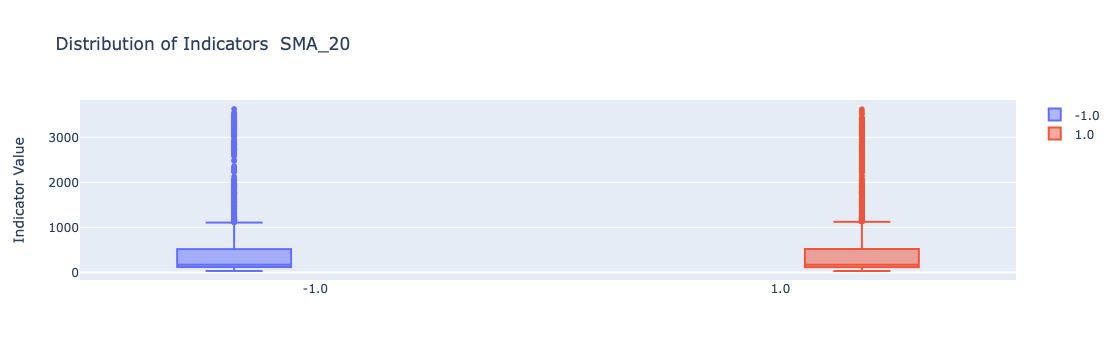

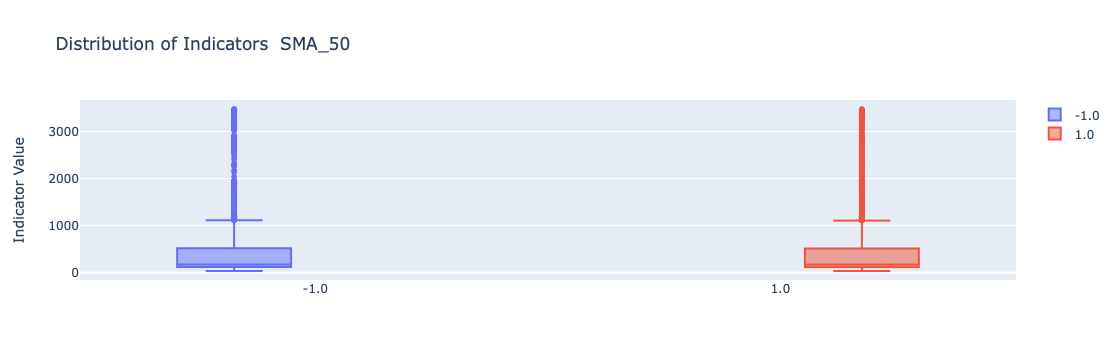

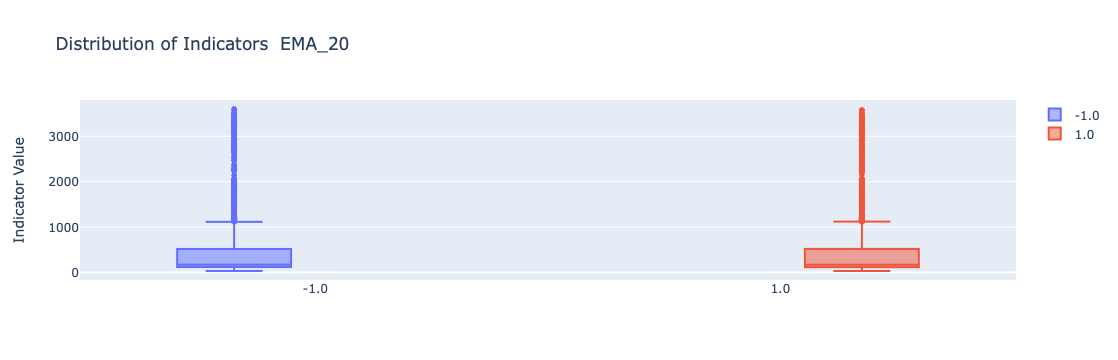

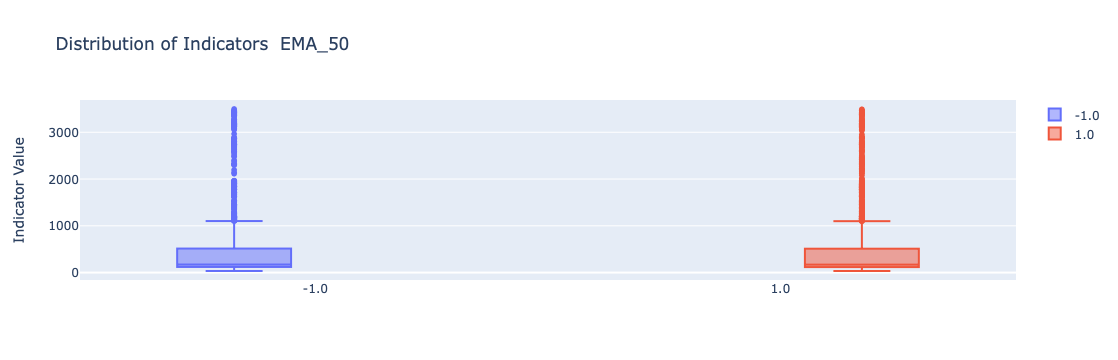

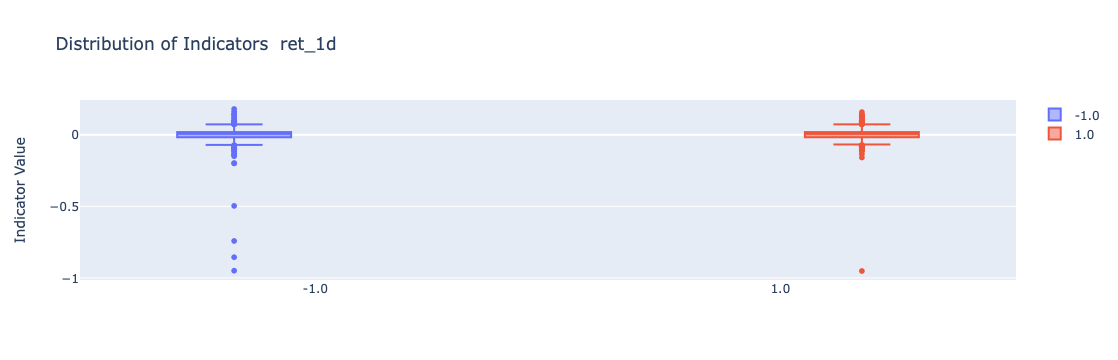

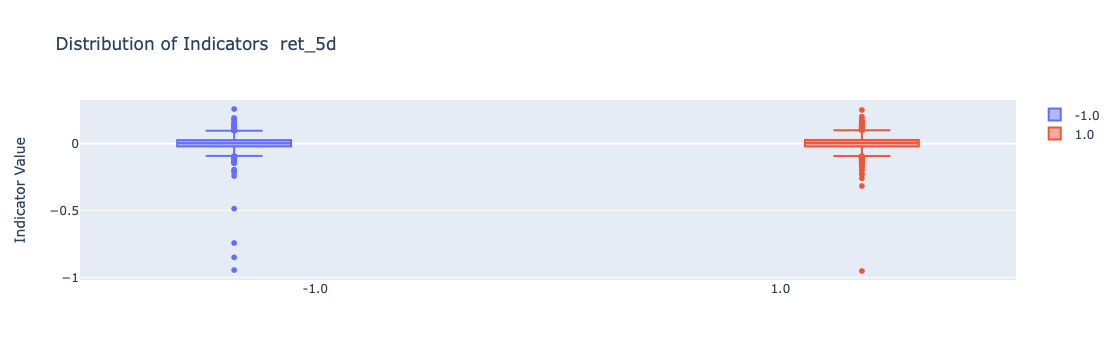

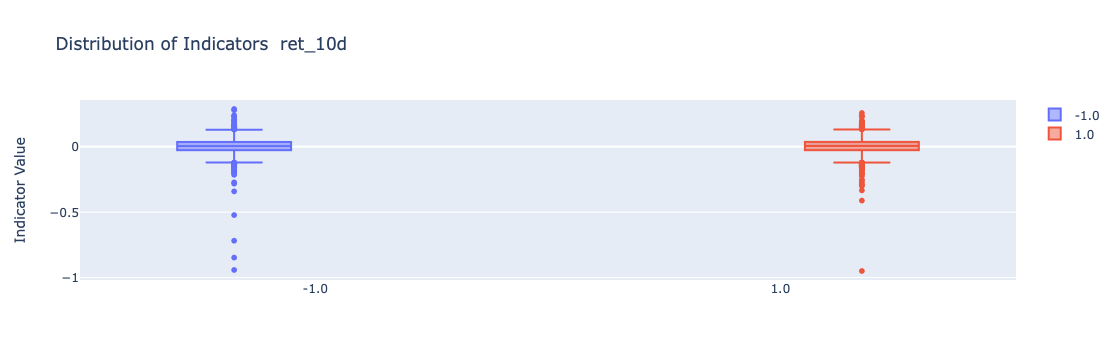

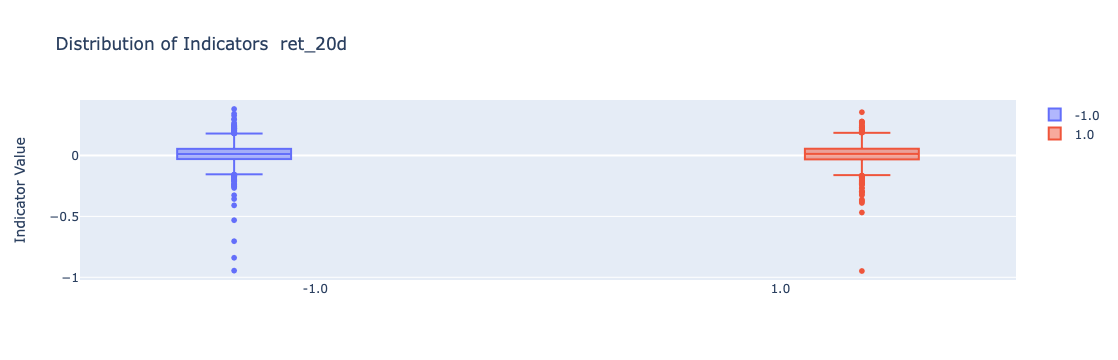

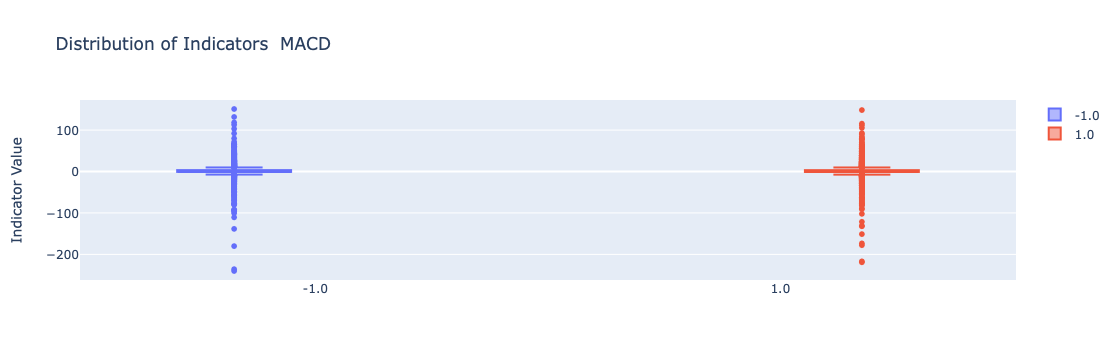

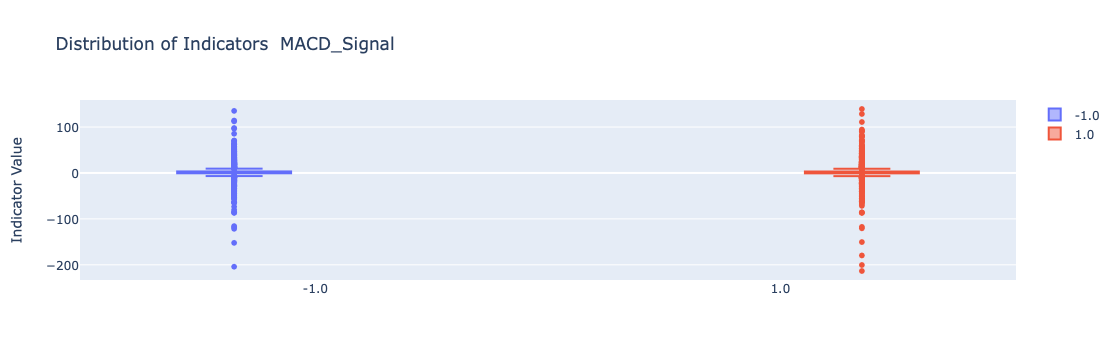

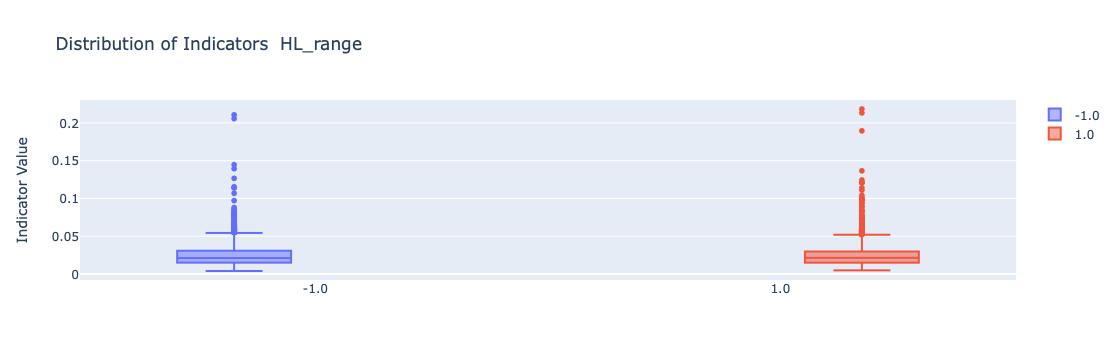

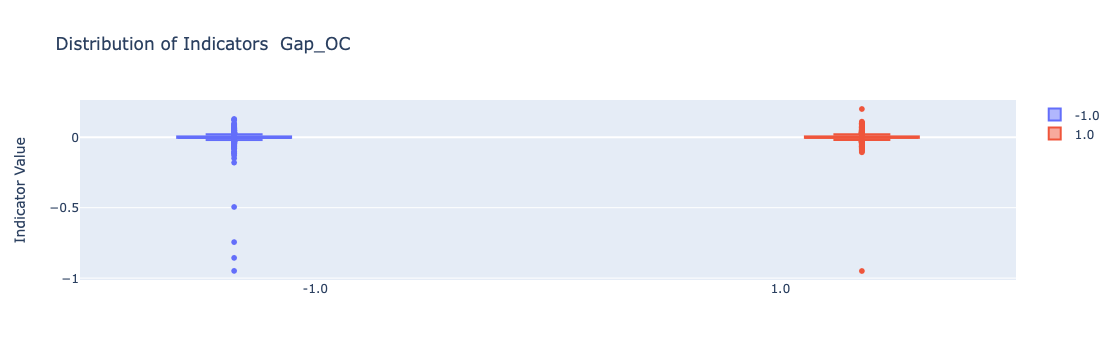

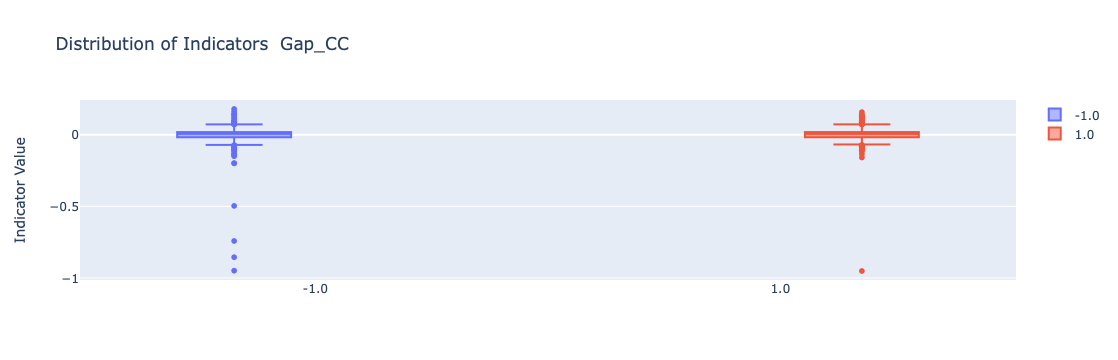

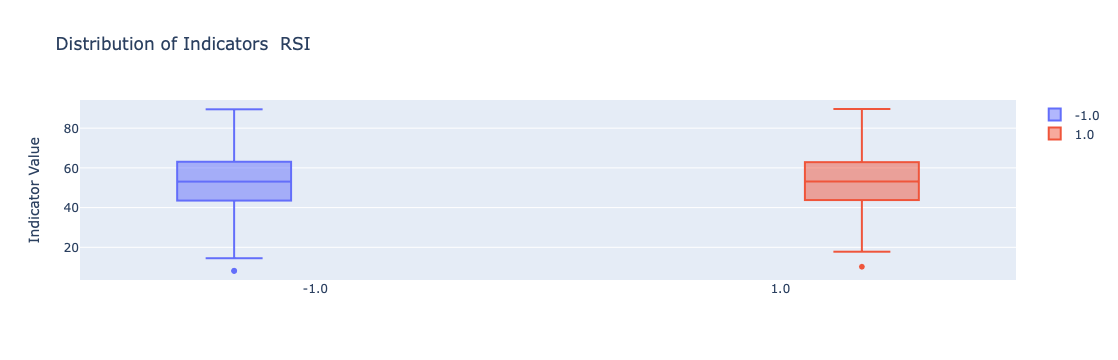

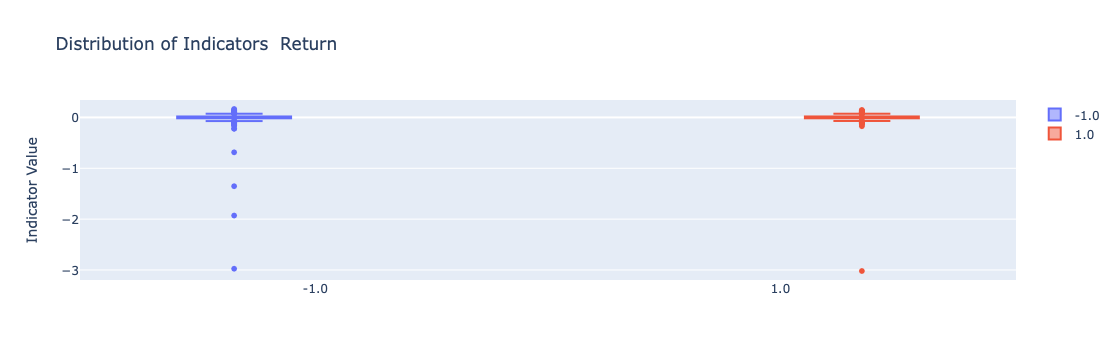

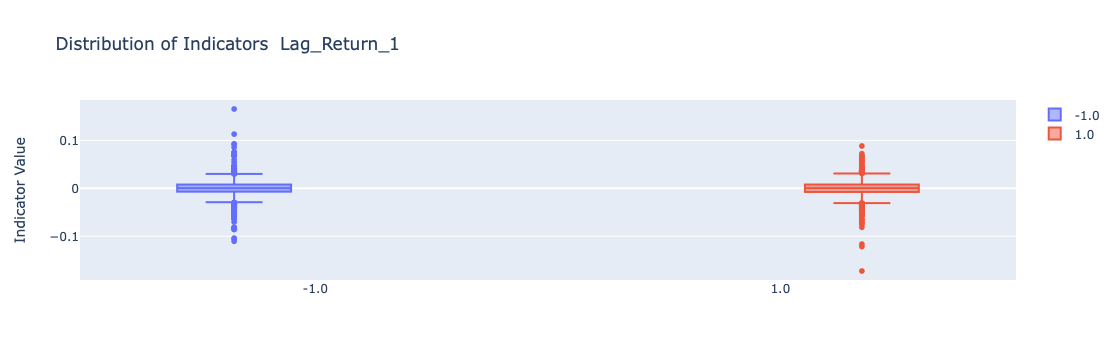

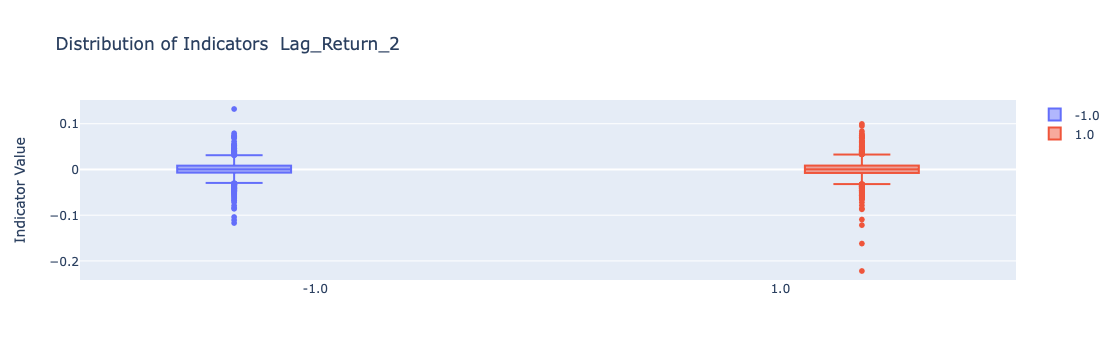

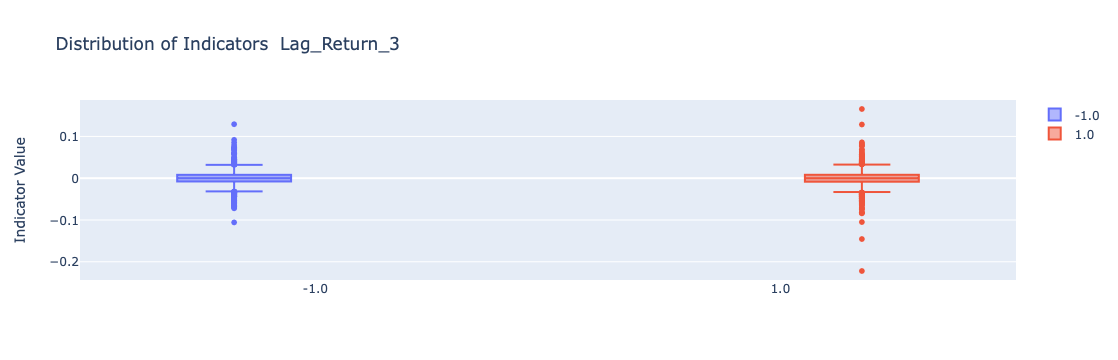

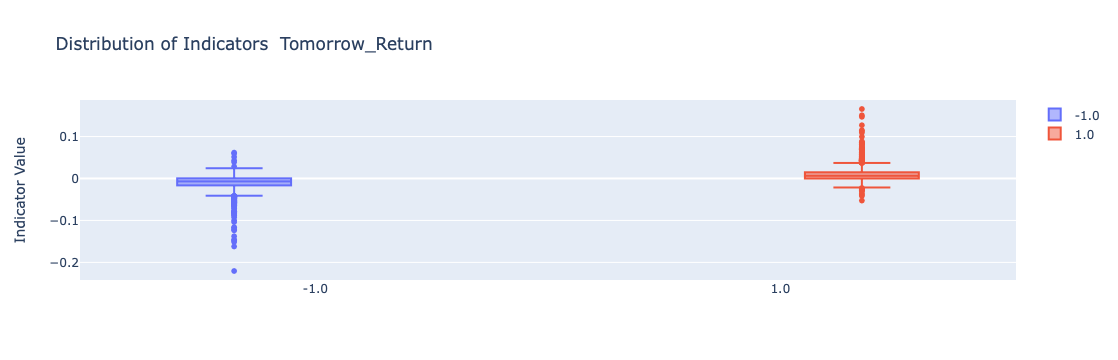

In [99]:
import plotly.graph_objects as go
import pandas as pd

def plot_indicator_distributions(df: pd.DataFrame, indicator_columns: list) -> None:
    """Plots box plots of indicator features for each label."""

    for col in indicator_columns:
        fig = go.Figure()

        for side in df['Side'].unique():
            if side != 0:
              fig.add_trace(go.Box(y=df[df['Side'] == side][col], name=side)) #只保留非 0 的标签来画图，也就是忽略 Label=0 的样本。一般在你前面的 meta-labeling 逻辑里，0 代表“不要交易/不值得跟”的样本，所以这里只看“有交易信号”的例子。
        fig.update_layout(title=f'Distribution of Indicators  {col}',
                         yaxis_title='Indicator Value',
                         boxmode='group')
        fig.show()


indicator_cols = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'ret_1d', 'ret_5d',
       'ret_10d', 'ret_20d', 'MACD', 'MACD_Signal', 'HL_range', 'Gap_OC',
       'Gap_CC', 'RSI', 'Return', 'Lag_Return_1', 'Lag_Return_2',
       'Lag_Return_3', 'Tomorrow_Return']

plot_indicator_distributions(subset, indicator_cols)
#遍历 indicator_cols 中的每一个指标;对每个非零 Side 画一个箱线图;显示一张按标签分组的指标分布图




In [105]:
from sklearn.model_selection import KFold
import numpy as np
from itertools import product

def purged_kfold_indices(n_samples, n_splits=5, purge_size=0): #n_samples：数据集总样本数（比如时间序列有 10,000 个时间点，就传 10000）;n_splits：折数，默认 5 折;
    #purge_size：在每个 test fold 前后，剔除多少个样本不参与训练（避免「测试窗口附近」的数据泄漏到训练中）;返回值是一个列表，里面每个元素是 (train_idx, test_idx) 的二元组，各自是 numpy 数组
    """
    Generate train-test indices for Purged k-Fold Cross Validation.

    Parameters:
    - n_samples (int): Total number of samples.
    - n_splits (int): Number of folds.
    - purge_size (int): Number of samples to exclude before and after the test set.

    Returns:
    - List of (train_indices, test_indices) tuples.
    """
    kf = KFold(n_splits=n_splits, shuffle=False) #创建一个普通的 KFold 切分器，不打乱顺序（因为时间序列要保持顺序）
    indices = np.arange(n_samples) #生成 [0, 1, 2, ..., n_samples-1] 的索引数组，每一个对应原数据中的一个样本

    folds = [] #初始化一个空列表，用来存放每一个 fold 的 (train_idx, test_idx)
    for train_idx, test_idx in kf.split(indices):   #kf.split(indices) 会根据 indices 给出 K 折的划分：
        test_start, test_end = test_idx[0], test_idx[-1] #每次返回 train_idx 和 test_idx，都是 numpy 数组，下标对应原数据的行号

        # Define the purge window
        purge_start = max(0, test_start - purge_size) #剔除区间从 test_start - purge_size 开始,但不能小于 0（数据开头）
        purge_end = min(n_samples, test_end + purge_size + 1) #剔除区间到 test_end + purge_size 结束;为了方便后面用 np.arange(purge_start, purge_end)，所以加了 1

        # Remove purged indices from training set
        train_idx = np.setdiff1d(train_idx, np.arange(purge_start, purge_end))

        folds.append((train_idx, test_idx)) #每个折都把 (train_idx, test_idx) 这个元组 append 到 folds 列表

    return folds


def param_grid_dicts(param_dict): #把类似 scikit-learn 的 param_grid（字典：每个参数对应一个候选值列表），展开成一组一组参数组合（字典格式），方便自己写网格搜索
    keys = list(param_dict.keys()) #keys 就是 ["max_depth", "learning_rate", "n_estimators"]
    values_product = product(*[param_dict[k] for k in keys]) #[param_dict[k] for k in keys]：变成一个列表，里面每个元素是这个参数的候选值列表：[[3, 5, 7], [0.01, 0.1], [100, 200]]。
    #product(*...)：展开成笛卡尔积，比如：(3, 0.01, 100),(3, 0.01, 200)...共12个
    for combo in values_product:
        yield dict(zip(keys, combo))

In [129]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

#encode unique identifier per stock using Ticker and Permno number. Later encoded as categorial variable
data["id"] = data["ticker"] + data["PERMNO"].astype(str) #把每只股票的 ticker 和 PERMNO 拼成一个字符串，作为唯一标识,比如 ticker="AAPL", PERMNO=12345 → "AAPL12345"

In [109]:
data_cv = data[(data["Date"]>= "2016-01-01") & (data["Date"]<= "2017-01-01")]

In [131]:
#drop forward looking columns from Features
X_cv = data_cv.drop(columns=["ticker","PERMNO", "Date", "End Time", "Side", "Tomorrow_Return", "id", "timestamp"]) #从 data_cv 中丢掉这些列;ticker, PERMNO, Date, id：身份/时间信息，不当作数值特征;End Time, timestamp：事件结束时间 / 垂直障碍的时间，这些是 label 生成过程的中间产物;Side：这是你的原始方向信号，要当作标签;Tomorrow_Return：这是前视信息（未来收益），不能当作输入特征，否则严重泄露未来。剩余的列就是各类技术指标、历史收益等特征。
y_cv = data_cv["Side"]

# Lightgbm expects class labels from 0 to num_class
mapping = {-1: 0, 0: 1, 1: 2} #mapping = {-1: 0, 0: 1, 1: 2}把原来的 3 个类别映射成 0,1,2：原始 -1 → 0;原始 0 → 1;原始 1 → 2
y_mv = y_cv.map(mapping).astype(int) #对 y_cv 中每个值应用映射，得到一个新的 Series；

y_lgbm = y_mv.values #把 Series 转成 numpy 数组，后面喂给 LightGBM

In [121]:
X_cv.columns

Index(['DlyVol', 'DlyClose', 'DlyLow', 'DlyHigh', 'DlyOpen', 'SMA_20',
       'SMA_50', 'EMA_20', 'EMA_50', 'ret_1d', 'ret_5d', 'ret_10d', 'ret_20d',
       'MACD', 'MACD_Signal', 'HL_range', 'Gap_OC', 'Gap_CC', 'RSI', 'Return',
       'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3'],
      dtype='object')

In [123]:
y_mv.value_counts()

Side
2    34825
0    29807
Name: count, dtype: int64

In [125]:
X_cv.describe()

DlyVol      DlyClose        DlyLow       DlyHigh       DlyOpen  \
count  6.463200e+04  64632.000000  64632.000000  64632.000000  64632.000000   
mean   1.931002e+06     44.224414     43.558294     44.828014     44.179301   
std    6.891373e+06     62.842718     62.054549     63.573014     62.831478   
min    3.420000e+02      0.067200      0.060000      0.076000      0.071500   
25%    1.269350e+05     12.467425     12.250000     12.690000     12.480000   
50%    4.208775e+05     28.210000     27.727500     28.680000     28.185000   
75%    1.489840e+06     55.560000     54.600000     56.380000     55.422500   
max    3.750886e+08    838.090000    832.400000    841.290000    841.020000   

             SMA_20        SMA_50        EMA_20        EMA_50        ret_1d  \
count  64632.000000  64632.000000  64632.000000  64632.000000  64632.000000   
mean      44.174185     44.092328     44.171046     44.057782      0.002101   
std       62.808484     62.662208     62.768154     62.511366      0.089504   
min        0.097050      0.150952      0.110629      0.158293     -0.801945   
25%       12.451875     12.480250     12.461829     12.508981     -0.021130   
50%       28.213375     28.296000     28.258585     28.379873      0.004910   
75%       55.289750     55.070000     55.332461     55.213141      0.022235   
max      829.754000    805.556400    821.799709    804.503844     11.578354   

       ...          MACD   MACD_Signal      HL_range        Gap_OC  \
count  ...  64632.000000  64632.000000  64632.000000  64632.000000   
mean   ...      0.040031      0.044005      0.036615      0.000521   
std    ...      1.366088      1.276776      0.033556      0.089715   
min    ...    -58.470940    -52.357484      0.000000     -0.799941   
25%    ...     -0.231288     -0.213993      0.017351     -0.005161   
50%    ...      0.031003      0.031562      0.027397      0.000000   
75%    ...      0.367754      0.349223      0.044444      0.005457   
max    ...     27.196777     24.848194      1.390830     14.211868   

             Gap_CC           RSI        Return  Lag_Return_1  Lag_Return_2  \
count  64632.000000  64632.000000  64632.000000  64632.000000  64632.000000   
mean       0.002101     51.174132      0.000670      0.000477      0.000316   
std        0.089504     13.435439      0.047981      0.025973      0.022931   
min       -0.801945      5.857022     -1.619208     -1.619208     -0.691244   
25%       -0.021130     41.666607     -0.021357     -0.008577     -0.008938   
50%        0.004910     51.364116      0.004898      0.000728      0.000383   
75%        0.022235     60.769597      0.021991      0.009852      0.009657   
max       11.578354     98.549751      2.531977      2.531977      0.466460   

       Lag_Return_3  
count  64632.000000  
mean      -0.000388  
std        0.025937  
min       -1.619208  
25%       -0.009597  
50%        0.000000  
75%        0.009155  
max        2.531977  

[8 rows x 23 columns]

In [127]:
#iterable Hyperparameter Combinations
cv_params = {'max_depth': [3, 5, 7, 10, 15, -1],  #树最大深度，-1 表示不限制深度
             'n_estimators': [100, 200, 300],     #树的棵树数（boosting 轮数）
             'learning_rate': [0.01, 0.05, 0.1]   #学习率
             }  

params_comb = param_grid_dicts(cv_params)

In [139]:
import lightgbm as lgb
from sklearn.metrics import f1_score, log_loss  #f1_score：分类 F1 分数; log_loss：多分类 log loss（对概率输出的损失）

n_samples = X_cv.shape[0]
n_splits = 5

folds = purged_kfold_indices(n_samples = n_samples , n_splits= n_splits, purge_size=20)

results = []

for params in params_comb:

    weighted_f1_scores = []
    log_loss_cv = [] 

    for fold, (train_idx, test_idx) in enumerate(folds, 1):
        
        # Extract training and test data for this fold.
        X_t, y_t = X_cv.iloc[train_idx , : ], y_lgbm[train_idx]
        X_val, y_val = X_cv.iloc[test_idx, : ], y_lgbm[test_idx]

        # Fit the model using Lightgbm.
        lgbm = lgb.LGBMClassifier(
                            objective='multiclass',
                            num_class=3,
                            **params,
                            num_leaves=32,
                            random_state=42,
                            )

        #fit model using early stopping.
        lgbm.fit(X_t,
                 y_t,
                 eval_set=[(X_val, y_val)],
                 eval_metric='multi_logloss',
                 callbacks=[
                     lgb.log_evaluation(period=10),
                     lgb.early_stopping(stopping_rounds=50) #early stopping; 这样当验证集 log loss 连续 50 轮没有改善时，就会停止训练
                 ]
        )

        #compute 
        y_pred = lgbm.predict(X_val)
        weighted_f1 = f1_score(y_pred=y_pred, y_true=y_val, average="weighted")
        weighted_f1_scores.append(weighted_f1)

        preds = lgbm.predict_proba(X_val)
        log_loss_cv.append(log_loss(y_val, preds,labels=[0, 1, 2]))


    mean_F1 = np.mean(weighted_f1_scores)
    mean_log_loss = np.mean(log_loss_cv)
    
    result_entry = {
        **params,
        "weighted F1" : mean_F1,
        "avg_log_loss" : mean_log_loss,
    }
    results.append(result_entry)

    print(f"mean F1 Score: {mean_F1},  mean Log Loss: {mean_log_loss}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5865
[LightGBM] [Info] Number of data points in the train set: 51685, number of used features: 23
[LightGBM] [Info] Start training from score -0.773887
[LightGBM] [Info] Start training from score -0.618442
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [141]:
df_results = pd.DataFrame(results)

In [143]:
df_results

max_depth  n_estimators  learning_rate  weighted F1  avg_log_loss
0           3           100           0.10     0.517475     18.966289
1           3           200           0.01     0.451352     18.965595
2           3           200           0.05     0.516309     18.966184
3           3           200           0.10     0.534344     18.967728
4           3           300           0.01     0.461818     18.965492
5           3           300           0.05     0.527293     18.966994
6           3           300           0.10     0.538961     18.968356
7           5           100           0.01     0.450028     18.965181
8           5           100           0.05     0.528539     18.966492
9           5           100           0.10     0.540848     18.968683
10          5           200           0.01     0.491030     18.965239
11          5           200           0.05     0.541434     18.968238
12          5           200           0.10     0.543693     18.969716
13          5           300           0.01     0.511350     18.965551
14          5           300           0.05     0.544196     18.968909
15          5           300           0.10     0.543693     18.969716
16          7           100           0.01     0.461875     18.964787
17          7           100           0.05     0.532665     18.966743
18          7           100           0.10     0.540803     18.969578
19          7           200           0.01     0.505788     18.964979
20          7           200           0.05     0.542648     18.968482
21          7           200           0.10     0.541432     18.969962
22          7           300           0.01     0.519681     18.965295
23          7           300           0.05     0.542451     18.968625
24          7           300           0.10     0.541432     18.969962
25         10           100           0.01     0.463255     18.964664
26         10           100           0.05     0.532097     18.966429
27         10           100           0.10     0.537691     18.969203
28         10           200           0.01     0.504495     18.964946
29         10           200           0.05     0.538796     18.967892
30         10           200           0.10     0.537691     18.969203
31         10           300           0.01     0.517660     18.965214
32         10           300           0.05     0.540067     18.968597
33         10           300           0.10     0.537691     18.969203
34         15           100           0.01     0.463135     18.964629
35         15           100           0.05     0.530020     18.966478
36         15           100           0.10     0.535751     18.968912
37         15           200           0.01     0.504265     18.964912
38         15           200           0.05     0.540584     18.968366
39         15           200           0.10     0.535751     18.968912
40         15           300           0.01     0.516415     18.965118
41         15           300           0.05     0.540850     18.968441
42         15           300           0.10     0.535751     18.968912
43         -1           100           0.01     0.463135     18.964629
44         -1           100           0.05     0.529899     18.966483
45         -1           100           0.10     0.532499     18.967700
46         -1           200           0.01     0.504284     18.964905
47         -1           200           0.05     0.535998     18.967927
48         -1           200           0.10     0.532499     18.967700
49         -1           300           0.01     0.516821     18.965145
50         -1           300           0.05     0.537031     18.968329
51         -1           300           0.10     0.532499     18.967700

In [147]:
results_df = pd.DataFrame(results)
best_row = results_df.sort_values("weighted F1", ascending=False).iloc[0]
best_params = {
    "max_depth": int(best_row["max_depth"]),
    "n_estimators": int(best_row["n_estimators"]),
    "learning_rate": float(best_row["learning_rate"]),
}
best_params


{'max_depth': 5, 'n_estimators': 300, 'learning_rate': 0.05}

In [149]:
mapping = {-1: 0, 0: 1, 1: 2}
inv_mapping = {0: -1, 1: 0, 2: 1}  # 回映射用

def make_X_y(df: pd.DataFrame):
    """
    给定一个带所有列的数据框，返回：
    X: 特征矩阵
    y_lgbm: 映射到 [0,1,2] 的标签（np.array）
    """
    X = df.drop(columns=[
        "ticker","PERMNO","Date","End Time","Side",
        "Tomorrow_Return","id","timestamp"
    ])
    y = df["Side"]
    y_mv = y.map(mapping).astype(int)
    return X, y_mv.values


In [151]:
# 训练 + CV 区间（和之前一致）
train_mask = (data["Date"] >= "2016-01-01") & (data["Date"] <= "2017-01-01")
data_train = data[train_mask].copy()

# 回测区间：举例用到 2018-01-01，你可以按自己需求改
test_mask = (data["Date"] > "2017-01-01") & (data["Date"] <= "2018-01-01")
data_test = data[test_mask].copy()

X_train, y_train = make_X_y(data_train)
X_test,  y_test  = make_X_y(data_test)

#这里的 y_test 只是用来看预测指标（accuracy / F1 等），策略回测不直接用它，而是用 Tomorrow_Return 来算真实收益。

In [153]:
#用最优参数训练最终模型
import lightgbm as lgb

lgbm_final = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    num_leaves=32,
    random_state=42,
    **best_params,  # 来自 CV 结果
)

lgbm_final.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5865
[LightGBM] [Info] Number of data points in the train set: 64632, number of used features: 23
[LightGBM] [Info] Start training from score -0.773966
[LightGBM] [Info] Start training from score -0.618374
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

LGBMClassifier(learning_rate=0.05, max_depth=5, n_estimators=300, num_class=3,
               num_leaves=32, objective='multiclass', random_state=42)

In [155]:
#在回测集上生成预测信号
# 预测类别（0/1/2）
y_pred_test = lgbm_final.predict(X_test)

# 预测概率（如果你想设置信心阈值，也可以用）
y_proba_test = lgbm_final.predict_proba(X_test)


In [159]:
#把预测类别映射回原始的 Side（-1/0/1）：
data_test = data_test.copy()
data_test["Side_pred_class"] = y_pred_test
data_test["Side_pred"] = data_test["Side_pred_class"].map(inv_mapping)

#现在 data_test 中每一行都有：Side：原始标签（真值方向，可以用于评估分类精度）；Side_pred：模型预测的交易方向（-1：做空，0：不交易，1：做多）。

In [163]:
#把信号变成收益：单笔 & 按天聚合
#在日期 t，根据特征预测 Side_pred(t)，从 t 收盘买入/卖出，持有到 t+1，这期间的标的收益就是 Tomorrow_Return(t)，策略收益就等于：
#策略收益(t) = Side_pred(t) * Tomorrow_Return(t)

# 单资产单事件收益（这里一行 = 某日某股票的一笔信号）
data_test["strategy_ret"] = data_test["Side_pred"] * data_test["Tomorrow_Return"]


In [165]:
# 按 Date 把所有股票等权合成一个“组合”
daily_ret = (
    data_test
    .groupby("Date")["strategy_ret"]
    .mean()
    .sort_index()
)

# 累计收益曲线（简单收益）
equity_curve = (1 + daily_ret).cumprod()


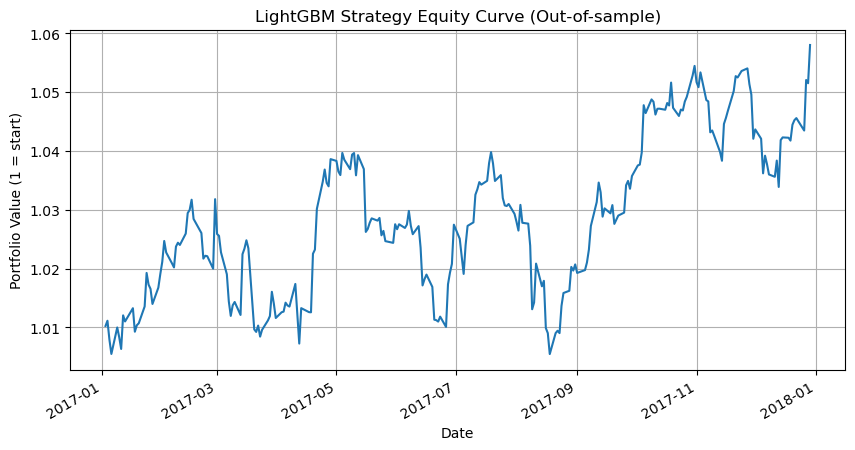

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
equity_curve.plot()
plt.title("LightGBM Strategy Equity Curve (Out-of-sample)")
plt.ylabel("Portfolio Value (1 = start)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

#conclusion on the chart:
#这条 LightGBM 策略的净值曲线 整体略微向上，回撤不大，说明模型确实学到了一些有用的方向信息，但 alpha 规模并不惊艳。
#从研究角度，它是一个“有效但还不够强”的 baseline，适合作为后续改进（特征工程、meta-labeling、仓位/阈值优化、与其他因子叠加）的起点。

#图示表达的内容：
#从 1 元起步，把每天所有股票的策略收益等权平均，然后把这些日收益连续乘起来，得到组合净值。

#整体表现
#起点：1.00 左右；终点：大约 1.055–1.06，说明这段回测区间的 总收益约 5–6%；时间跨度差不多一年，所以这是 年化 ~5–6% 的策略（未考虑交易成本和滑点）。

#风险侧：最大回撤 & 波动的直观感受
#最大回撤大约发生在 5–8 月，大致从 1.038 掉到 1.01 左右，约 –2.5%～–3%
#年化收益 ~5–6%，最大回撤 ~–3%，在不考虑交易成本的理想条件下，这是个 收益温和、回撤也比较可控 的曲线；

#模型特点：
#有一定方向性预测能力；在平均意义上，模型预测的多/空方向是偏对的。
#alpha 不算大
#明显存在 regime：好做的时期 & 难做的时期
#模型没有崩盘迹象

In [181]:
#年化收益 & 年化波动 & Sharpe

# 日平均收益 & 方差
mu_d = daily_ret.mean()
sigma_d = daily_ret.std()

# 每年交易天数
annual_factor = 252

annual_return = (1 + mu_d)**annual_factor - 1
annual_vol    = sigma_d * np.sqrt(annual_factor)
sharpe        = annual_return / annual_vol


In [183]:
cum_curve = (1 + daily_ret).cumprod()
cum_max = cum_curve.cummax()
drawdown = cum_curve / cum_max - 1
max_dd = drawdown.min()


In [185]:
win_rate = (daily_ret > 0).mean()


In [187]:
perf = pd.Series({
    "Annual Return": annual_return,
    "Annual Vol": annual_vol,
    "Sharpe": sharpe,
    "Max Drawdown": max_dd,
    "Win Rate (daily)": win_rate,
})
print(perf)

#In the 2017 out-of-sample backtesting, the prediction strategy based on LightGBM achieved an annualized return of approximately 6%,
#with an annualized volatility of only about 5.3%, a maximum drawdown of about 3.3%, an annualized Sharpe ratio of 1.13, and a daily 
#win rate of approximately 52.6%. This indicates that the model does possess a certain predictive ability in directional judgment and 
#can obtain moderate positive returns at a relatively low risk level. However, the overall alpha is limited.

Annual Return       0.059699
Annual Vol          0.052623
Sharpe              1.134469
Max Drawdown       -0.033017
Win Rate (daily)    0.525896
dtype: float64


In [199]:
from sklearn.metrics import accuracy_score

label_acc_num = accuracy_score(y_test, y_pred_test)

print(f"Out-of-sample trades: {len(y_test)}")
print(f"accuracy of predicted labels (numeric 0/1/2): {label_acc_num:.4f}")


Out-of-sample trades: 61449
accuracy of predicted labels (numeric 0/1/2): 0.5244


In [ ]:
#Comparison
#The Random Forest model achieved a label prediction accuracy of approximately 54.4%, slightly higher than the LightGBM model 
#(approximately 52.4%). However, at the strategy level, the two differed significantly: the LightGBM strategy achieved an annualized 
#return of approximately 5.97% and an annualized volatility of 5.26% during the backtesting period, corresponding to an annualized
#Sharpe ratio of 1.13 and a maximum drawdown of approximately 3.3%; while the Random Forest strategy had an annualized Sharpe of only 
#approximately 0.38. This indicates that although Random Forest has a slight advantage in classification accuracy, its profit and loss
#distribution is worse, and the losses from mispredictions are greater, making it difficult to translate into attractive risk-adjusted 
#returns.

#Considering both label accuracy and strategy performance, the LightGBM model significantly outperforms Random Forest under the settings 
#of this study and is more suitable as the main model for subsequent strategy optimization and expansion, while Random Forest is more 
#suitable as a control or ensemble component.